# Comparing BNs

| | | |
|-|-|-|
|[ ![Creative Commons License](images/cc4.png)](http://creativecommons.org/licenses/by-nc/4.0/) |[ ![aGrUM](images/logoAgrum.png)](https://agrum.org) |[ ![interactive online version](images/atbinder.svg)](https://agrum.gitlab.io/extra/agrum_at_binder.html)

In [1]:
def dict2html(di1,di2=None): 
    res= "<br/>".join([f"<b>{k:15}</b>:{v}" for k,v in di1.items()])
    if di2 is not None:
        res+="<br/><br/>"
        res+= "<br/>".join([f"<b>{k:15}</b>:{v}" for k,v in di2.items()])
    return res



In [2]:
import pyAgrum as gum
import pyAgrum.lib.notebook as gnb
import pyAgrum.lib.bn_vs_bn as gcm

## How to compare two BNs

PyAgrum allows you to compare BNs in several ways. This notebook show you some of them:
- a graphical diff between the 2 BNs
- some scores form recal and precision
- distance measures (for more, see notebook `26-klForBNs` for more)

### Between two different structures

The graphical diff propose to show the different possible structural differences from two structures with the same nodes in the layout of the first BN (the reference of the comparison).

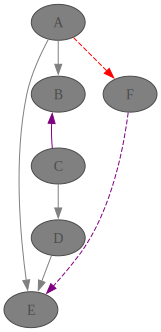

In [3]:
bn1=gum.fastBN("A->B->C->D->E<-A->F")
bn2=gum.fastBN("A->B<-C->D->E<-A;F->E")
gnb.showBNDiff(bn1,bn2)

The meaning of the diffent style for the arcs are :

In [4]:
import pyAgrum.lib.bn_vs_bn as bnvsbn
bnvsbn.graphDiffLegend()

In [5]:
cmp=gcm.GraphicalBNComparator(bn1,bn2)
kl=gum.ExactBNdistance(bn1,bn2) # bruteForce is possible car the BNs are small
gnb.sideBySide(bn1,bn2,gnb.getBNDiff(bn1,bn2),dict2html(cmp.scores(),cmp.hamming()),cmp.equivalentBNs(),dict2html(kl.compute()),
              captions=['bn1','bn2','graphical diff','Scores','equivalent ?','distances'],valign="bottom")

G <!-- A --> A A <!-- B --> B B <!-- A->B --> A->B <!-- E --> E E <!-- A->E --> A->E <!-- F --> F F <!-- A->F --> A->F <!-- C --> C C <!-- B->C --> <!-- C->B --> C->B <!-- D --> D D <!-- C->D --> C->D <!-- D->E --> D->E <!-- F->E --> F->E graphical diff,"count :{'tp': 4, 'tn': 22, 'fp': 2, 'fn': 2}recall :0.6666666666666666precision :0.6666666666666666fscore :0.6666666666666666dist2opt :0.47140452079103173hamming :2structural hamming:4Scores",B has different parents in the two bns whose names are in {'C'}equivalent ?,klPQ :3.045567405810375errorPQ :0klQP :2.8295107883418877errorQP :0hellinger :0.8999698359662911bhattacharya :0.5191482489724399jensen-shannon :0.4997609758995914distances


The logic for the arcs of the graphical diff is the following. When comparaing bn1 with bn2 (in that order) :
- full black line: the arc is common for both
- full red line: the arc is common but inverted in bn2
- dotted black line: the arc is added in bn2
- dotted red line: the arc is removed in bn2

For the scores :
- precision and recall are computed considering BN1 as the reference
- $Fscore=\frac{2\cdot recall\cdot precision}{recall+precision}$ is the weighted average of Precision and Recall.
- $dist2opt=\sqrt{(1-precision)^2+(1-recall)^2}$ represents the euclidian distance to the ideal(precision=1,recall=1)

`EquivalentBN` return "OK" if equivalent or a reason for non equivalence

Finally, `BruteForceKL` compute in the same time several distances : I-projection, M-projection, Hellinger and Bhattacharya. For more complex BNs, there exists a `GibbsKL` to approximate those distances. Of course, the computation are much slower.

### Same structure, different parameters

In [6]:
bn1=gum.fastBN("A->B->C->D->E<-A->F")
bn2=gum.fastBN("A->B->C->D->E<-A->F")
cmp=gcm.GraphicalBNComparator(bn1,bn2)
kl=gum.ExactBNdistance(bn1,bn2) # bruteForce is possible car the BNs are small
gnb.sideBySide(bn1,bn2,gnb.getBNDiff(bn1,bn2),dict2html(cmp.scores(),cmp.hamming()),cmp.equivalentBNs(),dict2html(kl.compute()),
              captions=['bn1','bn2','graphical diff','Scores','equivalent ?','distances'],valign="bottom")

G <!-- A --> A A <!-- B --> B B <!-- A->B --> A->B <!-- E --> E E <!-- A->E --> A->E <!-- F --> F F <!-- A->F --> A->F <!-- C --> C C <!-- B->C --> B->C <!-- D --> D D <!-- C->D --> C->D <!-- D->E --> D->E graphical diff,"count :{'tp': 6, 'tn': 24, 'fp': 0, 'fn': 0}recall :1.0precision :1.0fscore :1.0dist2opt :0.0hamming :0structural hamming:0Scores",Different CPTs for Aequivalent ?,klPQ :4.595330818081313errorPQ :0klQP :4.681417693285342errorQP :0hellinger :1.0608638716433985bhattacharya :0.8271725856550748jensen-shannon :0.6536477585102628distances


### identical BNs

In [7]:
bn1=gum.fastBN("A->B->C->D->E<-A->F")
bn2=bn1
cmp=gcm.GraphicalBNComparator(bn1,bn2)
kl=gum.ExactBNdistance(bn1,bn2) # bruteForce is possible car the BNs are small
gnb.sideBySide(bn1,bn2,gnb.getBNDiff(bn1,bn2),dict2html(cmp.scores(),cmp.hamming()),cmp.equivalentBNs(),dict2html(kl.compute()),
              captions=['bn1','bn2','graphical diff','Scores','equivalent ?','distances'],valign="bottom")

G <!-- A --> A A <!-- B --> B B <!-- A->B --> A->B <!-- E --> E E <!-- A->E --> A->E <!-- F --> F F <!-- A->F --> A->F <!-- C --> C C <!-- B->C --> B->C <!-- D --> D D <!-- C->D --> C->D <!-- D->E --> D->E graphical diff,"count :{'tp': 6, 'tn': 24, 'fp': 0, 'fn': 0}recall :1.0precision :1.0fscore :1.0dist2opt :0.0hamming :0structural hamming:0Scores",OKequivalent ?,klPQ :0.0errorPQ :0klQP :0.0errorQP :0hellinger :0.0bhattacharya :3.33066907387547e-16jensen-shannon :5.417804013542759e-18distances


In the notebook `Learning_DirichletPriorAndWeightedDatabase`, you can find an interresting discussion on how can change those scores and distance.